In [1]:
import numpy as np 
import pandas as pd 
import joblib

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
#Scaling
from sklearn.preprocessing import StandardScaler

#Train Test Split
from sklearn.model_selection import train_test_split

# Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

#Evaluation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
import os
import joblib
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,f1_score
#pip install openpyxl

In [2]:
df = pd.read_csv(r'Datasets/smoke_detection_iot.csv')
df.head()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [3]:
#df = resample(df, replace=True, n_samples=1000, random_state=42)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UTC             62630 non-null  int64  
 1   Temperature[C]  62630 non-null  float64
 2   Humidity[%]     62630 non-null  float64
 3   TVOC[ppb]       62630 non-null  int64  
 4   eCO2[ppm]       62630 non-null  int64  
 5   Raw H2          62630 non-null  int64  
 6   Raw Ethanol     62630 non-null  int64  
 7   Pressure[hPa]   62630 non-null  float64
 8   PM1.0           62630 non-null  float64
 9   PM2.5           62630 non-null  float64
 10  NC0.5           62630 non-null  float64
 11  NC1.0           62630 non-null  float64
 12  NC2.5           62630 non-null  float64
 13  CNT             62630 non-null  int64  
 14  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(7)
memory usage: 7.2 MB


In [5]:
df.isnull().sum()

UTC               0
Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
CNT               0
Fire Alarm        0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.drop_duplicates(inplace = True)

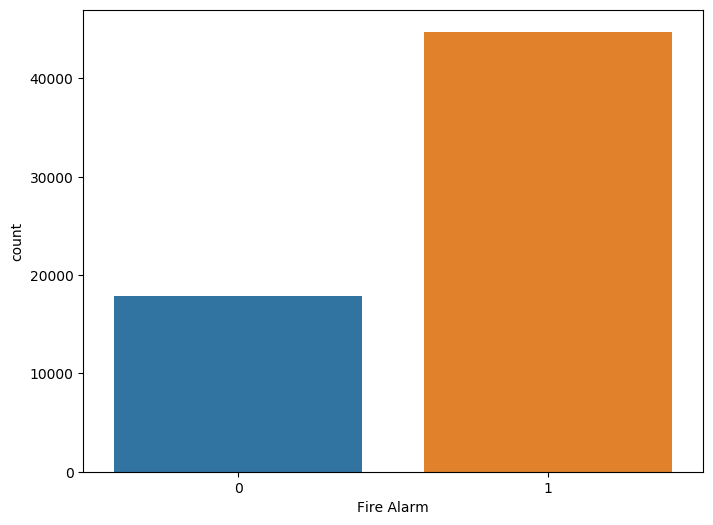

In [8]:
plt.figure(figsize = (8,6))
sns.countplot(df['Fire Alarm'])

In [9]:
df['Fire Alarm'].unique()

array([0, 1], dtype=int64)

In [10]:
df['Fire Alarm'].value_counts()

1    44757
0    17873
Name: Fire Alarm, dtype: int64

In [11]:
X = df.drop(['Fire Alarm'],axis = 1)
X

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT
0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0
1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,1
2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,2
3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,3
4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,1655130047,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739
62626,1655130048,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740
62627,1655130049,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741
62628,1655130050,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742


In [1]:
X.info()

NameError: name 'X' is not defined

In [13]:
y = df['Fire Alarm']
y

0        0
1        0
2        0
3        0
4        0
        ..
62625    0
62626    0
62627    0
62628    0
62629    0
Name: Fire Alarm, Length: 62630, dtype: int64

In [14]:
y.unique()

array([0, 1], dtype=int64)

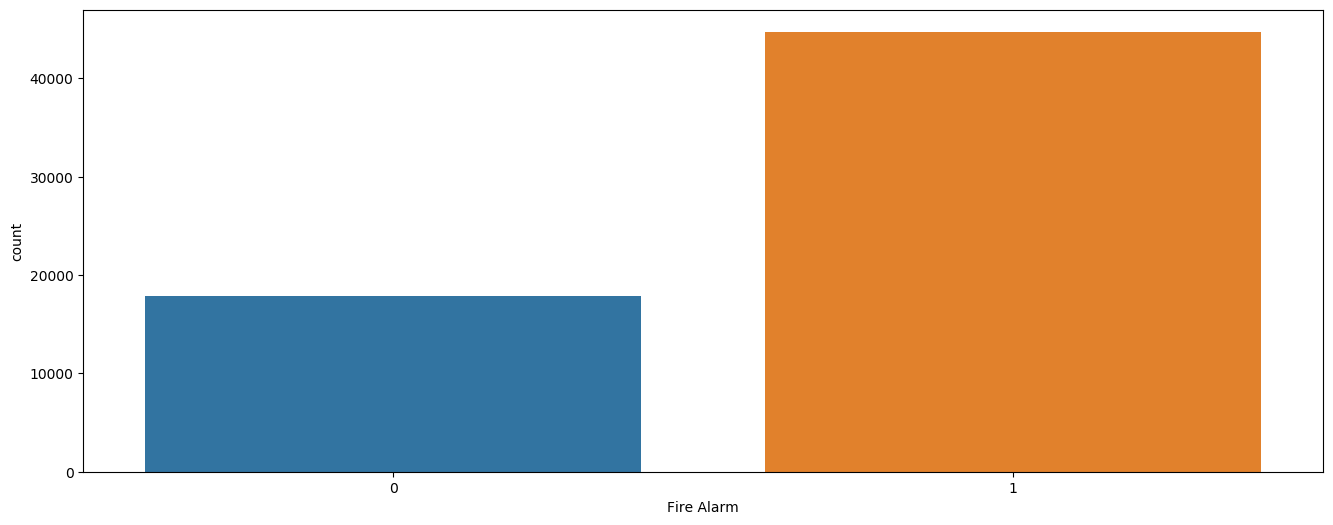

In [15]:
plt.figure(figsize=(16,6))
sns.countplot(x=y)

In [16]:
label_encoders = {}
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le 

In [17]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
#X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

In [19]:
#sns.countplot(x=y_resampled)

## Train Test Split

In [20]:
X_train,X_test,y_train,y_test= train_test_split(X_scaled, y, test_size=0.2,random_state=42 )

In [21]:
labels = ["Fire Alarm is OFF", "Fire Alarm is ON"]

In [22]:
precision = []
recall = []
fscore = []
accuracy = []

In [23]:
#function to calculate various metrics such as accuracy, precision etc
def calculateMetrics(algorithm, testY,predict):
    testY = testY.astype('int')
    predict = predict.astype('int')
    p = precision_score(testY, predict,average='macro') * 100
    r = recall_score(testY, predict,average='macro') * 100
    f = f1_score(testY, predict,average='macro') * 100
    a = accuracy_score(testY,predict)*100 
    accuracy.append(a)
    precision.append(p)
    recall.append(r)
    fscore.append(f)
    print(algorithm+' Accuracy    : '+str(a))
    print(algorithm+' Precision   : '+str(p))
    print(algorithm+' Recall      : '+str(r))
    print(algorithm+' FSCORE      : '+str(f))
    report=classification_report(predict, testY,target_names=labels)
    print('\n',algorithm+" classification report\n",report)
    conf_matrix = confusion_matrix(testY, predict) 
    plt.figure(figsize =(5, 5)) 
    ax = sns.heatmap(conf_matrix, xticklabels = labels, yticklabels = labels, annot = True, cmap="Blues" ,fmt ="g");
    ax.set_ylim([0,len(labels)])
    plt.title(algorithm+" Confusion matrix") 
    plt.ylabel('True class') 
    plt.xlabel('Predicted class') 
    plt.show()

Model loaded successfully.
Logistic Regression Accuracy    : 71.30768002554686
Logistic Regression Precision   : 50.0
Logistic Regression Recall      : 35.65384001277343
Logistic Regression FSCORE      : 41.62550097865598

 Logistic Regression classification report
                    precision    recall  f1-score   support

Fire Alarm is OFF       0.00      0.00      0.00      3594
 Fire Alarm is ON       0.71      1.00      0.83      8932

         accuracy                           0.71     12526
        macro avg       0.36      0.50      0.42     12526
     weighted avg       0.51      0.71      0.59     12526



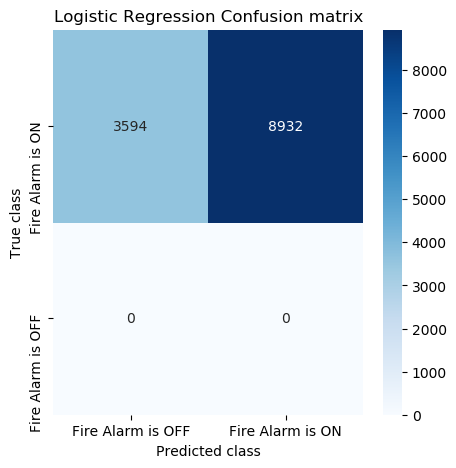

In [24]:
from sklearn.linear_model import LogisticRegression
import joblib
import os

if os.path.exists('model/LogisticRegression.pkl'):
    # Load the trained model from the file
    lr = joblib.load('model/LogisticRegression.pkl')
    print("Model loaded successfully.")
    predict = lr.predict(X_test)
    calculateMetrics("Logistic Regression", predict, y_test)
else:
    # Train the model (assuming X_train and y_train are defined)
    lr=LogisticRegression(penalty='l2', C=0.000001)
    lr.fit(X_train,y_train)
    joblib.dump(lr, 'model/LogisticRegression.pkl')
    print("Model saved successfully.")
    y_pred=lr.predict(X_test)

    # Save the trained model to a file

    predict = lr.predict(X_test)
    calculateMetrics("Logistic Regression", predict, y_test)


Model loaded successfully.
Random Forest Classifier Accuracy    : 100.0
Random Forest Classifier Precision   : 100.0
Random Forest Classifier Recall      : 100.0
Random Forest Classifier FSCORE      : 100.0

 Random Forest Classifier classification report
                    precision    recall  f1-score   support

Fire Alarm is OFF       1.00      1.00      1.00      3594
 Fire Alarm is ON       1.00      1.00      1.00      8932

         accuracy                           1.00     12526
        macro avg       1.00      1.00      1.00     12526
     weighted avg       1.00      1.00      1.00     12526



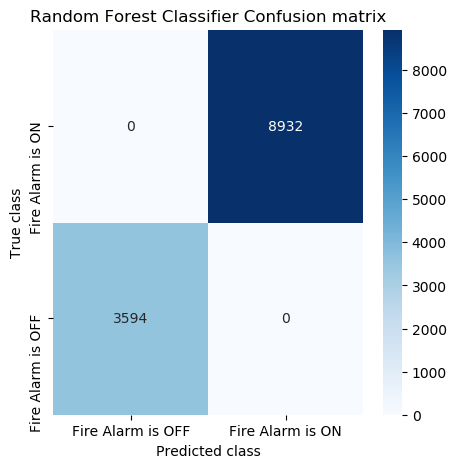

In [25]:
from sklearn.linear_model import LogisticRegression
import joblib
import os

if os.path.exists('model/RandomForestClassifier.pkl'):
    # Load the trained model from the file
    RFC = joblib.load('model/RandomForestClassifier.pkl')
    print("Model loaded successfully.")
    predict = RFC.predict(X_test)
    calculateMetrics("Random Forest Classifier", predict, y_test)
else:
    # Train the model (assuming X_train and y_train are defined)
    RFC = RandomForestClassifier(n_estimators=200, max_depth=15, random_state=42)
    RFC.fit(X_train, y_train)
    joblib.dump(RFC, 'model/RandomForestClassifier.pkl')
    print("Model saved successfully.")
    y_pred=lr.predict(X_test)

    # Save the trained model to a file

    predict = RFC.predict(X_test)
    calculateMetrics("Random Forest Classifier", predict, y_test)


In [26]:
test=pd.read_csv(r'Datasets/testdata.csv')
test

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT
0,1654742286,-5.210,50.99,356,400,13071,19909,939.250,0.44,0.46,3.06,0.477,0.011,8955
1,1654753613,13.585,53.66,1201,400,12945,19430,938.723,1.57,1.63,10.79,1.682,0.038,20282
2,1654756421,-21.999,53.73,1366,408,12967,19383,938.716,2.13,2.21,14.63,2.281,0.052,23090
3,1654746578,20.533,52.64,1109,529,12838,19449,938.894,1.97,2.05,13.55,2.113,0.048,13247
4,1655126371,-5.220,48.24,129,400,12802,20590,937.357,2.01,2.09,13.83,2.156,0.049,2063
5,1654777999,25.090,50.74,1235,420,12878,19423,938.760,2.25,2.34,15.47,2.413,0.054,16656
6,1654735398,21.960,51.04,7,400,13163,20043,939.638,0.70,0.73,4.82,0.751,0.017,2067
7,1654736929,4.182,58.15,338,400,13094,19872,939.641,1.53,1.59,10.55,1.646,0.037,3598
8,1654745248,16.027,50.88,1128,617,12810,19443,939.015,2.25,2.34,15.50,2.417,0.055,11917
9,1655126667,-1.011,48.67,166,428,12768,20558,937.341,2.03,2.11,13.95,2.175,0.049,2359


In [27]:
predict=RFC.predict(test)
predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [28]:
test['predict']= [labels[i] for i in predict]

In [29]:
test

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,predict
0,1654742286,-5.210,50.99,356,400,13071,19909,939.250,0.44,0.46,3.06,0.477,0.011,8955,Fire Alarm is ON
1,1654753613,13.585,53.66,1201,400,12945,19430,938.723,1.57,1.63,10.79,1.682,0.038,20282,Fire Alarm is ON
2,1654756421,-21.999,53.73,1366,408,12967,19383,938.716,2.13,2.21,14.63,2.281,0.052,23090,Fire Alarm is ON
3,1654746578,20.533,52.64,1109,529,12838,19449,938.894,1.97,2.05,13.55,2.113,0.048,13247,Fire Alarm is ON
4,1655126371,-5.220,48.24,129,400,12802,20590,937.357,2.01,2.09,13.83,2.156,0.049,2063,Fire Alarm is ON
5,1654777999,25.090,50.74,1235,420,12878,19423,938.760,2.25,2.34,15.47,2.413,0.054,16656,Fire Alarm is ON
6,1654735398,21.960,51.04,7,400,13163,20043,939.638,0.70,0.73,4.82,0.751,0.017,2067,Fire Alarm is ON
7,1654736929,4.182,58.15,338,400,13094,19872,939.641,1.53,1.59,10.55,1.646,0.037,3598,Fire Alarm is ON
8,1654745248,16.027,50.88,1128,617,12810,19443,939.015,2.25,2.34,15.50,2.417,0.055,11917,Fire Alarm is ON
9,1655126667,-1.011,48.67,166,428,12768,20558,937.341,2.03,2.11,13.95,2.175,0.049,2359,Fire Alarm is ON
